In [203]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('monokai')

## Introduction
### 1. The Context
The Shinkansen, popularly known as the bullet train, is a crucial mode of travel in Japan, renowned for its efficiency and speed. However, despite its high profile, only 56% of passengers have reported satisfaction with their experience. The travel industry is focused on understanding the factors contributing to both satisfaction and dissatisfaction among passengers. Improving the experience for those who are dissatisfied could markedly elevate overall satisfaction scores.
### 2. The Objective
The primary objective of this project is to analyze various factors, such as travel distance, delays, and demographic variables, to understand their impact on passenger satisfaction. This analysis aims to provide the travel industry with detailed insights into key areas that influence passenger satisfaction, thereby facilitating improvements in service and passenger experience.
### 3. The Key Questions
- What factors most influence passenger satisfaction on the Shinkansen?
- Is there a noticeable difference in satisfaction levels across different demographic groups?
- How do travel distance and delay times correlate with passenger satisfaction?

#### Table of contents: 
- [Data exploration](#Data-exploration)
- [Cleaning](#Data-cleaning)
- [Cleaning summary](#Cleaning-summary)
- [Analysis](#Analysis)
- [Analysis summary](#Analysis-summary)
- [Insights, recommendations + conclusion](#Insights-and-recommendations-+-conclusion)

In [204]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
np.set_printoptions(suppress=True)
import missingno as msno
# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.express as px
pio.renderers.default = "svg"
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import skew, pearsonr, normaltest, ttest_ind, f_oneway, chisquare, chi2_contingency as chi2cont, shapiro
import warnings
warnings.filterwarnings("ignore")

## Data dictionary 
| Variable                | Description                                      | Type   |
|-------------------------|--------------------------------------------------|--------|
| `ID`                    | Unique identifier for each survey response       | int64  |
| `Overall_Experience`    | Satisfaction level (1: Satisfied, 0: Not)        | int64  |
| `Seat_Comfort`          | Comfort of the seat                              | object |
| `Seat_Class`            | Class of seat (Regular, or Green(premium)        | object |
| `Arrival_Time_Convenient`| Convenience of arrival time                     | object |
| `Catering`              | Quality of food and beverages                    | object |
| `Platform_Location`     | Location of the platform                         | object |
| `Onboard_Wifi_Service`  | Quality of onboard WiFi service                  | object |
| `Onboard_Entertainment` | Entertainment options onboard                    | object |
| `Online_Support`        | Quality of online support services               | object |
| `Ease_of_Online_Booking`| Ease of booking online                           | object |
| `Onboard_Service`       | Quality of onboard service                       | object |
| `Legroom`               | Amount of legroom available                      | object |
| `Baggage_Handling`      | Efficiency of baggage handling                   | object |
| `CheckIn_Service`       | Quality of check-in service                      | object |
| `Cleanliness`           | Overall cleanliness                             | object |
| `Online_Boarding`       | Ease of online boarding process                  | object |

In [205]:
train = pd.read_csv('/Users/moiezismail/projects/Shinkansen/train_travel.csv')
survey = pd.read_csv('/Users/moiezismail/projects/Shinkansen/train_survey.csv')

## Data exploration

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [207]:
train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [208]:
train.sample(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
61267,98861268,Male,NaN,26.00,Business Travel,Business,4858,0.00,0.00
63331,98863332,Male,Loyal Customer,58.00,Business Travel,Business,1646,0.00,0.00
41913,98841914,Female,Disloyal Customer,47.00,Business Travel,Eco,1958,0.00,0.00
48485,98848486,Female,Loyal Customer,16.00,Business Travel,Business,1156,0.00,0.00
84263,98884264,Female,NaN,67.00,Personal Travel,Eco,440,4.00,14.00


### Observations
1. The shinkansen being late by 126 min does not make any sense, it's most likely seconds so 
that will be changed

In [209]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [210]:
survey.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [211]:
survey.sample(5)

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
22451,98822452,0,Needs Improvement,Green Car,Extremely Poor,Needs Improvement,Convenient,Excellent,Needs Improvement,Excellent,Excellent,Acceptable,Needs Improvement,Good,Acceptable,Good,Excellent
56875,98856876,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Poor,Acceptable,Acceptable,Good,Good,Good,Good,Good,Good,Poor
81611,98881612,0,Good,Green Car,Acceptable,Good,Inconvenient,Excellent,Good,Good,Excellent,Poor,Good,Good,Good,Acceptable,Excellent
51492,98851493,1,Extremely Poor,Green Car,Excellent,Extremely Poor,Inconvenient,Excellent,Extremely Poor,Excellent,Excellent,Excellent,Good,Good,Good,Good,Excellent
23228,98823229,1,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Good,Excellent,Good,Good,Good,Good,Good,Excellent,Good,Good


#### Observations
1. We'll have to deal with the NULL/missing values for both the train and survey data before
we merge the dataset but fortunately, the amount of NULL values isn't significant so they
can be just dropped if need be. 
2. It does not make sense to have NULL values categories such as "leg room" as it's not possible that it did not apply to a passenger or that there was a lack of leg-room so we may have to do conditional imputation of a score. 

## Data cleaning

#### Merged datasets of travel and survey

In [212]:
data = survey.merge(train, on='ID', how='left')

### making copies

In [213]:
shinki = data.copy()

In [214]:
shinki = shinki.dropna()

#### Feature engineering

In [215]:
shinki['delay(seconds)'] = shinki['Departure_Delay_in_Mins'] + shinki[
    'Arrival_Delay_in_Mins']
#Travel class does not make sense, Seat class is actual representation of seat categories
shinki.drop(['Departure_Delay_in_Mins',
             'Arrival_Delay_in_Mins', 'Travel_Class'], axis=1, inplace=True)

In [216]:
shinki.rename(columns={'Overall_Experience': 'Satisfied',
                      'Travel_Distance':'Travel_Distance(km)'}, inplace=True)

#### Getting proper distance values for aggregation

In [217]:
shinki['Travel_Distance(km)'] = round(shinki['Travel_Distance(km)'] / 10)

In [218]:
shinki[['Age', 'delay(seconds)', 'Travel_Distance(km)']] = shinki[
    ['Age', 'delay(seconds)', 'Travel_Distance(km)']].astype('int64')

In [219]:
shinki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55503 entries, 1 to 94375
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       55503 non-null  int64 
 1   Satisfied                55503 non-null  int64 
 2   Seat_Comfort             55503 non-null  object
 3   Seat_Class               55503 non-null  object
 4   Arrival_Time_Convenient  55503 non-null  object
 5   Catering                 55503 non-null  object
 6   Platform_Location        55503 non-null  object
 7   Onboard_Wifi_Service     55503 non-null  object
 8   Onboard_Entertainment    55503 non-null  object
 9   Online_Support           55503 non-null  object
 10  Ease_of_Online_Booking   55503 non-null  object
 11  Onboard_Service          55503 non-null  object
 12  Legroom                  55503 non-null  object
 13  Baggage_Handling         55503 non-null  object
 14  CheckIn_Service          55503 non-nul

#### I will exclude passengers younger than 18 to make the dataset more appropriate for ratings

In [220]:
shinki = shinki[shinki['Age'] >= 18]

#### Age-groups 

In [221]:
shinki['Age_Group'] = shinki['Age'].apply(lambda x: 'Young Adult' if (x >= 18 and x <= 29)
                                            else ('Middle' if (x >= 30 and x <= 45)
                                            else ('Upper Age' if (x >= 46 and x <= 59)
                                            else 'Elder')))

#### Excluding short distances from the travel distance data
1. I do not think journies less than 50km are long enough to give proper feedback

In [222]:
shinki = shinki[shinki['Travel_Distance(km)'] >= 50]

In [223]:
shinki.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,46190.00,98847106.97,27244.12,98800002.00,98823504.50,98846980.50,98870762.75,98894376.00
Satisfied,46190.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00
Age,46190.00,40.54,13.37,18.00,29.00,40.00,51.00,85.00
Travel_Distance(km),46190.00,213.81,93.56,50.00,153.00,200.00,262.00,695.00
delay(seconds),46190.00,30.90,78.09,0.00,0.00,2.00,25.00,2028.00


#### Observations
1. The average age is about 39 years-old but if rounded to the nearest 10th then 40.
2. The travel distance is skewed because the minimum is 5 which only makes sense if a passenger was travelling from Tokyo to Shinagawa station. I will drop all journies below 30 kilometers as I feel that is not a long enough journey to be properly documented for travel experience. 
3. delay is quite skewed as the minimum is 0 and the max is 2028(about 34 minutes) with the 75 percentile under 24 minutes. We will have to deal with the outliers by excluding any rows with outliers in the subset

#### Equalizing subjective score
- The subjective score/evalution such as adequate, or needs imporvement are different so 
this will check which ones needs equalizing 

In [224]:
selected_columns = ['Seat_Comfort', 'Arrival_Time_Convenient',
       'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
       'Onboard_Entertainment','Seat_Class', 'Online_Support', 'Ease_of_Online_Booking',
       'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service',
       'Cleanliness', 'Online_Boarding', 'Gender', 'Customer_Type', 'Type_Travel']

for i in selected_columns:
    unique_values = shinki[i].unique()
    print(f"Unique values in {i}:")
    for value in unique_values:
        print(value)
    print()

Unique values in Seat_Comfort:
Poor
Needs Improvement
Acceptable
Good
Excellent
Extremely Poor

Unique values in Arrival_Time_Convenient:
Excellent
Needs Improvement
Acceptable
Good
Poor
Extremely Poor

Unique values in Catering:
Poor
Needs Improvement
Acceptable
Good
Excellent
Extremely Poor

Unique values in Platform_Location:
Needs Improvement
Manageable
Inconvenient
Very Convenient
Convenient
Very Inconvenient

Unique values in Onboard_Wifi_Service:
Good
Needs Improvement
Acceptable
Poor
Excellent
Extremely Poor

Unique values in Onboard_Entertainment:
Poor
Good
Excellent
Needs Improvement
Acceptable
Extremely Poor

Unique values in Seat_Class:
Ordinary
Green Car

Unique values in Online_Support:
Good
Excellent
Acceptable
Poor
Needs Improvement

Unique values in Ease_of_Online_Booking:
Good
Excellent
Acceptable
Poor
Needs Improvement
Extremely Poor

Unique values in Onboard_Service:
Excellent
Good
Acceptable
Needs Improvement
Poor
Extremely Poor

Unique values in Legroom:
Needs Imp

#### Cleaning up labels

In [225]:
shinki.loc[shinki['Type_Travel'] == 'Personal Travel', 'Type_Travel'] = 'pers'
shinki.loc[shinki['Type_Travel'] == 'Business Travel', 'Type_Travel'] = 'biz'
shinki.loc[shinki['Customer_Type'] == 'Disloyal Customer', 'Customer_Type'] = 'infrequent'
shinki.loc[shinki['Customer_Type'] == 'Loyal Customer', 'Customer_Type'] = 'loyal'
shinki.loc[shinki['Gender'] == 'Male', 'Gender'] = 'M'
shinki.loc[shinki['Gender'] == 'Female', 'Gender'] = 'F'
shinki.loc[shinki['Satisfied'] == 1, 'Satisfied'] = 'yes'
shinki.loc[shinki['Satisfied'] == 0, 'Satisfied'] = 'no'           
# Changing seat categories to more sensible terms
shinki.loc[shinki['Seat_Class'] == 'Ordinary', 'Seat_Class'] = 'regular'
shinki.loc[shinki['Seat_Class'] == 'Green Car', 'Seat_Class'] = 'premium'

In [226]:
shinki['num_sat'] = shinki['Satisfied'].map({'yes':1, 'no':0})

### Simplifying the 5-stage score into 3: poor, adequate, good

In [227]:
satisfaction_categories = {
    'Poor': 'Poor',
    'Needs Improvement': 'Poor',
    'Inconvenient':'Poor',
    'Very Convenient':'Good',
    'Very Inconvenient':'Poor',
    'Convenient':'Good',
    'Mangeable':'Acceptable',
    'Acceptable': 'Acceptable',
    'Good': 'Good',
    'Excellent': 'Good',
    'Extremely Poor': 'Poor'
}

columns_to_simplify = [
    'Seat_Comfort',
    'Arrival_Time_Convenient',
    'Catering',
    'Platform_Location',
    'Online_Support',
    'Onboard_Service',
    'Cleanliness']

for i in columns_to_simplify:
    shinki[i] = shinki[i].replace(satisfaction_categories)

In [228]:
shinki['delay(seconds)'].describe()

count   46190.00
mean       30.90
std        78.09
min         0.00
25%         0.00
50%         2.00
75%        25.00
max      2028.00
Name: delay(seconds), dtype: float64

In [229]:
shinki.sample(3).T

,66580,40485,3024
ID,98866581,98840486,98803025
Satisfied,no,no,no
Seat_Comfort,Acceptable,Poor,Poor
Seat_Class,premium,regular,regular
Arrival_Time_Convenient,Acceptable,Poor,Acceptable
Catering,Acceptable,Poor,Acceptable
Platform_Location,Poor,Poor,Manageable
Onboard_Wifi_Service,Acceptable,Poor,Good
Onboard_Entertainment,Acceptable,Poor,Acceptable
Online_Support,Acceptable,Poor,Acceptable


#### Outliers management
1. We will eliminate the outliers for the delay because it's highly skewed to the left

In [230]:
# Function to remove outliers using the Z-Score method
def remove_zscore_outliers(df, column_name):
    z_scores = stats.zscore(df[column_name])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    return df[filtered_entries]

# remove outliers from 'delay(seconds)' column
shinki = remove_zscore_outliers(shinki, 'delay(seconds)')

# Confirm that outliers are removed
shinki['delay(seconds)'].describe()

count   45170.00
mean       22.09
std        43.84
min         0.00
25%         0.00
50%         2.00
75%        21.00
max       265.00
Name: delay(seconds), dtype: float64

#### Creating a subset of important/relevant columns
-I'm making an executive decision here to eliminate the variables which are:
1. not entirely within Shinkansen's control nor expertise
2. not strong indicators of whether or not a passenger will be satisfied from their journey.
3. irrelevant or redundant or don't make any sense. 

In [232]:
shinki.columns

Index(['ID', 'Satisfied', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding',
       'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Distance(km)',
       'delay(seconds)', 'Age_Group', 'num_sat'],
      dtype='object')

In [233]:
#### passenger details
cleaned_train = shinki[['Gender', 'Age', 'Age_Group', 'Customer_Type',
       'Type_Travel','Seat_Class', 'Travel_Distance(km)', 'delay(seconds)','ID']]
#### passenger feedback
cleaned_survey = shinki[['Satisfied','Seat_Comfort','Catering', 
                         'Online_Support', 'Cleanliness', 
                         'Catering', 'Onboard_Service','num_sat']]

#### Main table
shinki = shinki[[
    'Satisfied', 'Gender', 'Age', 'Age_Group', 'Customer_Type',
    'Type_Travel','Seat_Class', 'Seat_Comfort', 'Catering', 
     'Cleanliness','Online_Support','Onboard_Service','Travel_Distance(km)', 
    'delay(seconds)', 'num_sat','ID',
]]

### Cleaning summary
1. **Data Merging**: Merged 'survey' and 'train' datasets on 'ID' using a left join to form a single dataset.
  
2. **Null Value Removal**: Dropped all rows with any null values to ensure data integrity.

3. **Feature Engineering**: 
    - Created 'delay(seconds)' by summing 'Departure_Delay_in_Mins' and 'Arrival_Delay_in_Mins'.
    - Dropped the original delay, travel class.

4. **Renaming Columns and values**: 
    - Renamed 'Overall_Experience' to 'Satisfied'.
    - Renamed 'Travel_Distance' to 'Travel_Distance(km)' and rounded the values.
    - Renamed 'Ordinary' and 'Green Car' to more sensible terms

5. **Type Conversion**: Converted 'Age', 'delay(seconds)', and 'Travel_Distance(km)' to integer data types.

6. **Filtering Data**: 
    - Excluded passengers younger than 18 years.
    - Excluded journeys shorter than 50km to focus on substantial travel experiences.

7. **Age Group Categorization**: Categorized 'Age' into defined age groups.

8. **Outlier Removal**: 
    - Applied Z-score method to remove outliers in 'delay(seconds)'.

9. **Simplification of Satisfaction Scores**: 
    - Simplified rating categories into 'Poor', 'Acceptable', and 'Good'.

10. **Creating numerical column**: Created the 'num_sat' column from categorical satisfied column

11. **Subjective Column Selection**: Chose to keep columns considered strong indicators of passenger satisfaction.

12. **Subsetting Data**: Created subsets from the cleaned data for more focused analyses.

13. **Standardizing Terms**: Standardized categorical variables for consistency.

14. **Duplicate Management**: Checked for and managed duplicate entries.

15. **Final Dataset Information**: 
    - Assessed the final dataset to ensure correct data types and non-null values

In [234]:
shinki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45170 entries, 1 to 94375
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Satisfied            45170 non-null  object
 1   Gender               45170 non-null  object
 2   Age                  45170 non-null  int64 
 3   Age_Group            45170 non-null  object
 4   Customer_Type        45170 non-null  object
 5   Type_Travel          45170 non-null  object
 6   Seat_Class           45170 non-null  object
 7   Seat_Comfort         45170 non-null  object
 8   Catering             45170 non-null  object
 9   Cleanliness          45170 non-null  object
 10  Online_Support       45170 non-null  object
 11  Onboard_Service      45170 non-null  object
 12  Travel_Distance(km)  45170 non-null  int64 
 13  delay(seconds)       45170 non-null  int64 
 14  num_sat              45170 non-null  int64 
 15  ID                   45170 non-null  int64 
dtypes: i

### Exporting as CSV file

In [238]:
cleaned_train.to_csv('cleaned_train.csv'),
cleaned_survey.to_csv('cleaned_survey.csv'),
shinki.to_csv('Shinkansen.csv', index=False)

In [239]:
shinki.drop('ID', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Age,45170.00,40.52,13.36,18.00,29.00,40.00,51.00,85.00
Travel_Distance(km),45170.00,211.83,92.33,50.00,152.00,199.00,260.00,695.00
delay(seconds),45170.00,22.09,43.84,0.00,0.00,2.00,21.00,265.00
num_sat,45170.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00


#### Observations:
1. **'Age'**: The average age of customers is approximately 40.5 years, with a standard deviation of 13.36 years. The data indicates a relatively widespread age distribution, mostly ranging from 29 to 51 years, which are the 25th and 75th percentiles, respectively. The youngest customer is 18, while the oldest is 85.
  
2. **'Travel_Distance(km)'**: The average travel distance is about 211.83 km, with a standard deviation of 92.33 km. The minimum travel distance is 50 km, and the maximum is 695 km. Most travel distances fall between 152 km and 260 km, as indicated by the 25th and 75th percentiles.

3. **'delay(seconds)'**: The average delay is approximately 22.09 seconds, with a standard deviation of 43.84 seconds. This suggests a significant spread in delay times, mostly between 0 and 21 seconds, as indicated by the 25th and 75th percentiles. The maximum delay is 265 seconds, which is substantially higher than the average, pointing to the presence of outliers.

4. **'num_sat'**: This binary variable has a mean of 0.54 and a standard deviation of 0.50, indicating that slightly more than half of the customer experiences were satisfactory (assuming 1 denotes satisfaction). The minimum and maximum values are 0 and 1, and the 25th and 75th percentiles are also 0 and 1, confirming the binary nature of this variable.

These observations should provide a comprehensive understanding of the cleaned dataset's numerical features.

## Analysis
- 1. Demographics
- 2. Travel metrics

### Demographic Analysis

#### Age Distribution
- **Visualize the Age Distribution**: Utilize a histogram to view how passenger ages are spread across the dataset. Select an optimal number of bins to accurately depict the age variation.

#### Satisfaction by Age Group
- **Group by Age Group and Satisfaction**: Group the data by `Age_Group` and calculate the mean satisfaction score within each group to evaluate how satisfaction varies with age.

#### Gender and Satisfaction Analysis
- **Cross-tabulation of Gender and Satisfaction**: Construct a cross-tabulation table to showcase the number of satisfied versus dissatisfied passengers, segregated by gender.

- **Chi-squared Test for Independence**: Implement the chi-squared test to determine if a significant relationship exists between gender and satisfaction among passengers.

#### Distribution and statistical summary of numerical variables
- First, let's have a look at some summary stats 

In [240]:
shinki.drop(columns='ID').describe().T

,count,mean,std,min,25%,50%,75%,max
Age,45170.00,40.52,13.36,18.00,29.00,40.00,51.00,85.00
Travel_Distance(km),45170.00,211.83,92.33,50.00,152.00,199.00,260.00,695.00
delay(seconds),45170.00,22.09,43.84,0.00,0.00,2.00,21.00,265.00
num_sat,45170.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00


#### Observations
1. **Age:** With a range from 18 to 85 years, the dataset encompasses a full spectrum of adult ages, highlighting the broad appeal or usage of the service across different age groups.

2. **Travel Distance (km):** The maximum travel distance of 695 kilometers suggests that some journeys are quite long, possibly indicating the service covers substantial geographic distances.

3. **Delay (Seconds):** The maximum delay of 265 seconds (over 4 minutes) contrasts sharply with the median delay of just 2 seconds, pointing towards occasional significant delays amidst generally prompt service.

4. **Num Sat:** The binary nature of this metric (ranging from 0 to 1) with a mean of 0.54 could indicate a near-even split in a specific characteristic or satisfaction metric among the passengers.

5. **Best Fit:** The close clustering of values around the mean (with a standard deviation of only 0.74) suggests this metric might be a calculated score or rating with a specific, narrow focus, reflecting a consistent aspect or quality of the service.

#### Now the same but with all the categorical variables including our dependent variable(satisfaction)

In [241]:
shinki.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Satisfied,45170,2,yes,24379
Gender,45170,2,M,23227
Age_Group,45170,4,Middle,17056
Customer_Type,45170,2,loyal,35865
Type_Travel,45170,2,biz,32710
Seat_Class,45170,2,premium,22719
Seat_Comfort,45170,3,Poor,19093
Catering,45170,3,Poor,18929
Cleanliness,45170,3,Good,29604
Online_Support,45170,3,Good,26762


#### Observations
- **Satisfaction**: Only around 54% reported being satisfied with their Shinkansen travel experience which is a TERRIBLE statistic and the most important one to investigate.
- **Gender**: About half-half distribution of male(51%) to female(49%)
- **Age Group**: The "Middle" age group is the largest category(38%).
- **Customer Type**: A significant majority of passengers (approximately 79%) are classified as "loyal"(regular, reoccuring) customers.
- **Type of Travel**: Business travel is the dominant reason for using the Shinkansen, as approximately 72% of respondents indicated "biz"(business/work) as their travel type.
- **Seat Class**: "Premium" seat class is chosen by about half of the passengers.
- **Seat Comfort**: More than a third(around 42%) rated seat comfort as "Poor."
- **Catering**: Just like seat comfort, a significant portion of passengers (approximately 42%) rated catering as "Poor."
- **Online Support**: The highest satisfaction level among respondents is for online support, with approximately 59% rating it as "Good."
- **Ease of Online Booking**: Approximately 56% of passengers found the ease of online booking to be "Good."
- **Onboard Service**: About 55% of respondents rated onboard service as "Good."
- **Baggage Handling**: The highest satisfaction level in the dataset is for baggage handling, with around 65% of passengers indicating "Good" satisfaction.
- **Check-In Service**: Approximately 49% of passengers were satisfied with check-in service, rating it as "Good."
- **Cleanliness**: Cleanliness received high satisfaction, with around 65% of passengers rating it as "Good."
- **Online Boarding**: Approximately 50% of passengers reported "Good" satisfaction with online boarding.

In [242]:
# Let's analyze satisfaction % by age-group
# NOTE: 1= yes and 0=no so we can get the satisfaction rate easily as a %
satisfied_groups = shinki.groupby('Age_Group')['num_sat'].mean().to_frame()
satisfied_groups['num_sat'] = satisfied_groups['num_sat'] * 100
satisfied_groups

,num_sat
Age_Group,
Elder,42.20
Middle,55.07
Upper Age,64.68
Young Adult,45.32


**Observations**
1. It seems that mid-20s and early 40s make up the largest portion of the demographic
while also having the highest satisfaction percentage

#### Satisfaction by age-group

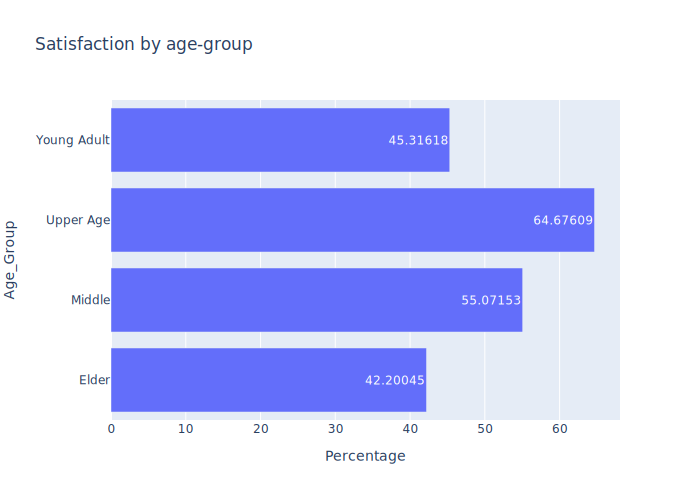

In [243]:
px.bar(satisfied_groups, 
       y=satisfied_groups.index,  
       x='num_sat', 
       title='Satisfaction by age-group',
       labels={'num_sat': 'Percentage'},
       text_auto=True,
       orientation='h') 

**observations**
- Across all age groups, females tend to have a higher satisfaction rate compared to males so age and gender together play a critical role in satisfaction, particularly within the Elder demographic
- The Elder and Young Adult male groups have the highest dissatisfaction rates while
the Middle and Upper Age groups are more balanced

#### Satisfaction by gender

In [244]:
# Let's analyze satisfaction % by gender
# NOTE: 1= yes and 0=no so we can get the satisfaction rate easily as a %
gender_satisfied = shinki.groupby('Gender')['num_sat'].mean().to_frame().reset_index()
gender_satisfied

,Gender,num_sat
0,F,0.64
1,M,0.44


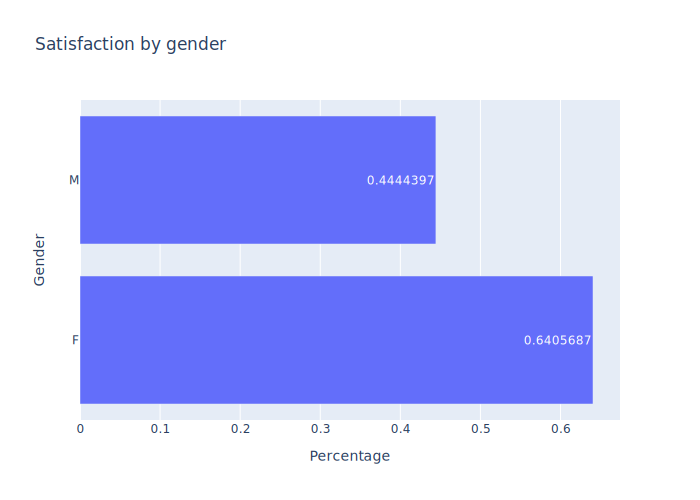

In [245]:
px.bar(gender_satisfied, 
       x='num_sat',  
       y='Gender',
       title='Satisfaction by gender',
       labels={'num_sat': 'Percentage','Gender':'Gender'},
       text_auto=True,
       orientation='h') 

#### Observations: 
- There are more satisfied women than men across all age-groups and seat classes

## Chi-Squared Test for Independence

**Hypotheses**
- **Null Hypothesis (\( H_0 \))**: There is no association between gender and passenger satisfaction.
- **Alternative Hypothesis (\( H_1 \))**: There is an association between gender and passenger satisfaction.

**Test Execution**
- Conduct the chi-squared test on the contingency table derived from the Gender and Satisfied columns.
- Calculate the p-value to evaluate the hypotheses.

In [246]:
# first a crosstab of the gender and satisfied passengers
gender_satisfaction_cross = pd.crosstab(shinki['Gender'], shinki['Satisfied'])
gender_satisfaction_cross

Satisfied,no,yes
Gender,,
F,7887,14056
M,12904,10323


In [247]:
# let's run the chi-square test for independence
chi2, p, dof, expected = chi2cont(gender_satisfaction_cross)
p

0.0

#### Observation
- The p-value of 0.0 indicates that we have failed to reject the null and thus there exists a significant association between gender and satisfaction

### Travel Metrics Analysis
1. **Visualizing Travel Distance and Delay Times**: 
   - Step 1: Create a graph that plots travel distance against delay times.
   - Step 2: Use satisfaction as a color dimension to add another dimension.
2. **visualization of Delay Times**: 
   - Step 3: Produce violin plot to visualize delays.
   - Step 4: Identify outliers

### Regression analysis

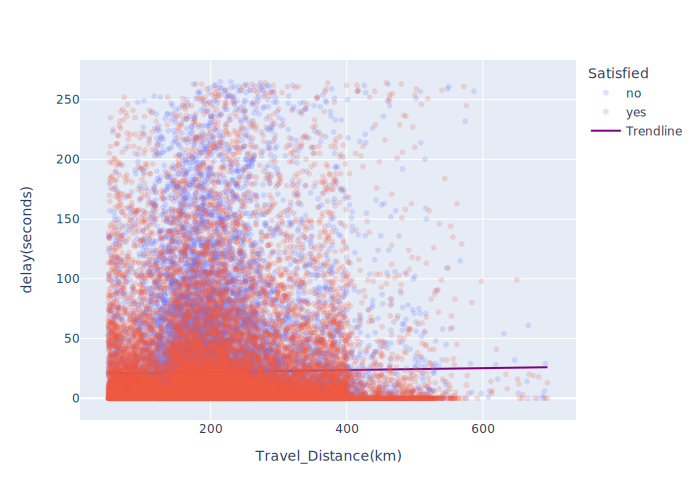

R^2: 0.0002864149320592757


In [248]:
# Assuming shinki is your DataFrame and it has 'Travel_Distance(km)' and 'delay(seconds)' columns
X = shinki['Travel_Distance(km)']
y = shinki['delay(seconds)']

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Getting the line of best fit
shinki['best_fit'] = model.predict(X)

# Plotting the scatter plot along with the line of best fit
fig = px.scatter(shinki, x='Travel_Distance(km)',y='delay(seconds)',
                 color='Satisfied',opacity=0.2)
fig.add_scatter(x=shinki['Travel_Distance(km)'],
                y=model.predict(), mode='lines', 
                name='Trendline', line=dict(color='purple'))
fig.show()

# Print out the R^2 value
print(f"R^2: {model.rsquared}")

**observations**
Observations:
- R² of 0.0029 suggests no significant linear correlation between travel distance and delays.
- Most journeys have low delays indicating punctuality
- Satisfied and dissatisfied passengers are distributed regardless of travel distance or delay, indicating other factors affect satisfaction
- Distance is not a reliable predictor of delay or passenger satisfaction and vice versa. 

## Analysis summary
### 1. Age Distribution
- Visualized the age distribution of passengers using a histogram.
- Identified mid-20s and early 40s as the largest demographic groups.

### 2. Satisfaction by Age Group
- Grouped data by 'Age_Group' and calculated mean satisfaction scores.
- Observed variations in satisfaction percentages across different age groups.

### 3. Gender and Satisfaction Analysis
- Constructed a cross-tabulation table for Gender and Satisfaction.
- Performed a Chi-squared Test for Independence, revealing a significant association between gender and passenger satisfaction.

### 4. Relationship between Travel Distance and Delay Times
- Created a scatter plot to compare travel distance against delay times.
- Used satisfaction levels as a color dimension in the plot.
- Determined a very low R² value, indicating no significant linear correlation between travel distance and delays.

## Insights and recommendations + conclusion
### Insights
1. **Travel Distance and Delays**: Travel distance is not a significant factor affecting delay times because initial hypothesis was that longer travel distances correlates with longer delays but the analysis revealed a negligible correlation between them. 
2. **Passenger Satisfaction**: The analysis revealed that that passenger satisfaction is not solely dependent on travel distance or delay times, rather, service quality or amenities, play a more crucial role in determining it.
3. **Demographic Factors**: Analysis revealed varying satisfaction trends across different age and gender groups. Interestingly, gender was found to have a significant impact on satisfaction, with notable disparities between age-groups.
### Recommendations
1. **Focus on Service Quality**: Given that delay times and travel distances do not significantly impact passenger satisfaction, it would be imperative for Shinkansen to focus on improving overall service quality and onboard amenities.
2. **Targeted Customer Experience Improvements**: Understanding the different satisfaction levels across age and gender demographics, personalized services or targeted marketing strategies could be employed to enhance the customer experience for specific groups such as the elderly and leisurely travel passengers. 
## Conclusion
The comprehensive analysis indicates that passenger satisfaction in this travel context is influenced by factors beyond just the quantitative measures of travel distance and delay times. The demographic analysis particularly underscores the need for a more nuanced approach to understanding and enhancing passenger satisfaction. As such, focusing on service quality improvements and tailored experiences based on age-groups could be a more effective strategy than simply addressing travel logistics.